<a href="https://colab.research.google.com/github/rixprakash/Jarheads/blob/main/Project%203/SCRIPTS/EDAcode3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/rixprakash/Jarheads

fatal: destination path 'Jarheads' already exists and is not an empty directory.


Image counts:
Real: 0
Fake: 0


<ipython-input-2-6f54b00750b9>:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-2-6f54b00750b9>:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


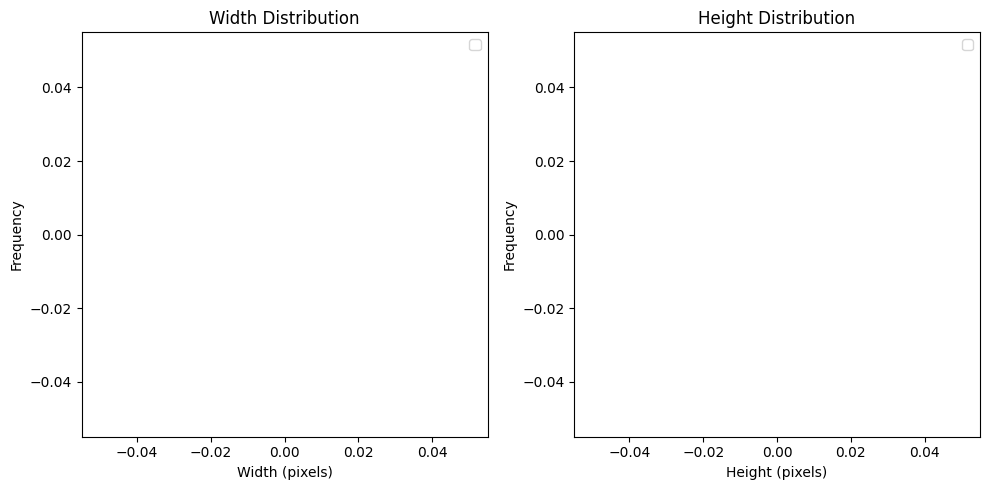

In [2]:
# create code to do EDA on the DALLE_dataset which contains folders that are named fake and another named real. We are training a model to understand the difference between real and fake photos so do EDA on these folders which contains pictures
#prompt: create code to do EDA on the DALLE_dataset which contains folders that have fake photos and real photos.

import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Assuming the dataset is in the 'Jarheads' directory
dataset_path = '/content/Jarheads/DATA/DeepGuardDB_v1/DALLE_dataset'

# Initialize dictionaries to store image counts
image_counts = {'real': 0, 'fake': 0}
image_sizes = {'real': [], 'fake': []}

# Iterate through subfolders (real and fake images)
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        label = 'real' if 'real' in folder_name.lower() else 'fake'  # Determine label based on folder name
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
              try:
                  img = Image.open(image_path)
                  width, height = img.size
                  image_counts[label] += 1
                  image_sizes[label].append((width, height))
              except Exception as e:
                print(f"Error processing {image_path}: {e}")


# Print image counts
print("Image counts:")
print(f"Real: {image_counts['real']}")
print(f"Fake: {image_counts['fake']}")


# Plot image size distributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(x=[size[0] for size in image_sizes['real']], kde=True, label='Real')
sns.histplot(x=[size[0] for size in image_sizes['fake']], kde=True, label='Fake')
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(x=[size[1] for size in image_sizes['real']], kde=True, label='Real')
sns.histplot(x=[size[1] for size in image_sizes['fake']], kde=True, label='Fake')
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
